Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [66]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [41]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_dir = "/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir = "/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
data_dir_train = pathlib.Path(train_dir)
data_dir_test = pathlib.Path(test_dir)

In [42]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [43]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [44]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    subset='training',
    label_mode='categorical',
    validation_split=0.2,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [45]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    subset='validation',
    label_mode='categorical',
    validation_split=0.2
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [46]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

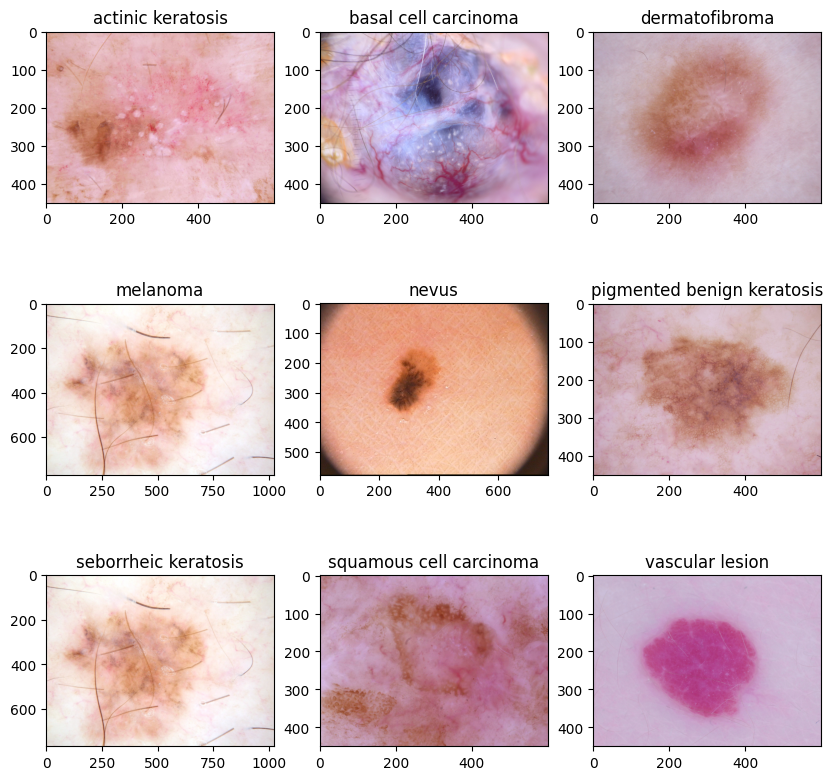

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for value in range(9):
    plt.subplot(3, 3, value+1)
    image = plt.imread(str(list(data_dir_train.glob(class_names[value]+'/*.jpg'))[1]))
    plt.title(class_names[value])
    plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [48]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [49]:
### We created a model with 2*2 layers of Convolution with MaxPooling

model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names), activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [50]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# View the summary of all layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    16,588,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,655,657 (63.54 MB)

 Trainable params: 16,655,657 (63.54 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [52]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
 2/56 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.1094 - loss: 2.8228 

W0000 00:00:1710884853.432091      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1880 - loss: 2.3404

W0000 00:00:1710884858.863506      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.1885 - loss: 2.3365 - val_accuracy: 0.2819 - val_loss: 1.9372
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.2870 - loss: 1.8946 - val_accuracy: 0.3512 - val_loss: 1.8214
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3995 - loss: 1.7910 - val_accuracy: 0.4430 - val_loss: 1.6092
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4252 - loss: 1.6262 - val_accuracy: 0.4810 - val_loss: 1.4703
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4723 - loss: 1.4593 - val_accuracy: 0.5570 - val_loss: 1.3531
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.4996 - loss: 1.4208 - val_accuracy: 0.5324 - val_loss: 1.3961
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5344 - loss: 1.3216 - val_accuracy: 0.5078 - val_loss: 1.5201
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5622 - loss: 1.2706 - val_accuracy: 0.4407 - val_loss: 

### Visualizing training results

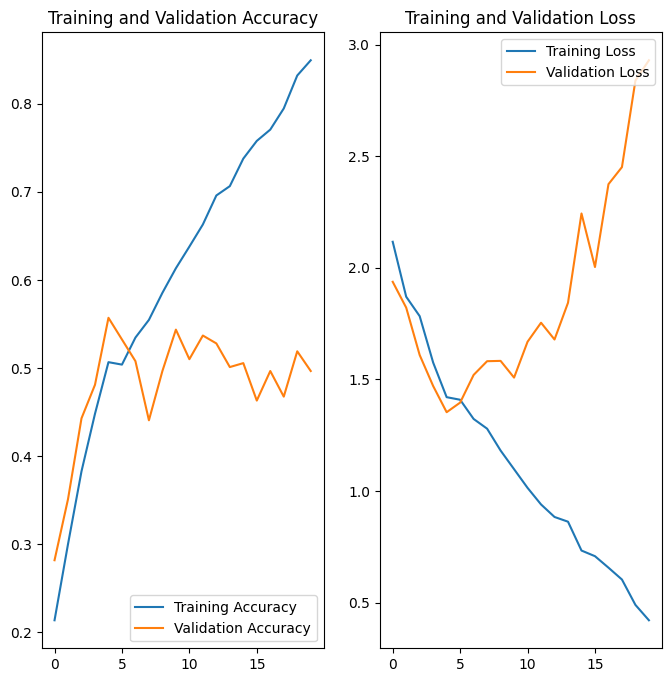

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## Findings:
- As we observe from above graph that training accuracy is getting increased with epochs but there is no improvement for Validation Accuracy which is stuck 0.5.
- Besides we observe that Training Loss is continuously decreasing but Validation Loss decreases till a certain point and increased afterwards.

    Based on Accuracy and Loss of Training and Validation data, we can decide that our model seems overfit

In [54]:
# We created below Image Augmentation model with Flip, Rotation and Zoom
augmentation_layer = keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.3, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.3, 0.2), width_factor=(0.3, 0.2), fill_mode='reflect')
])

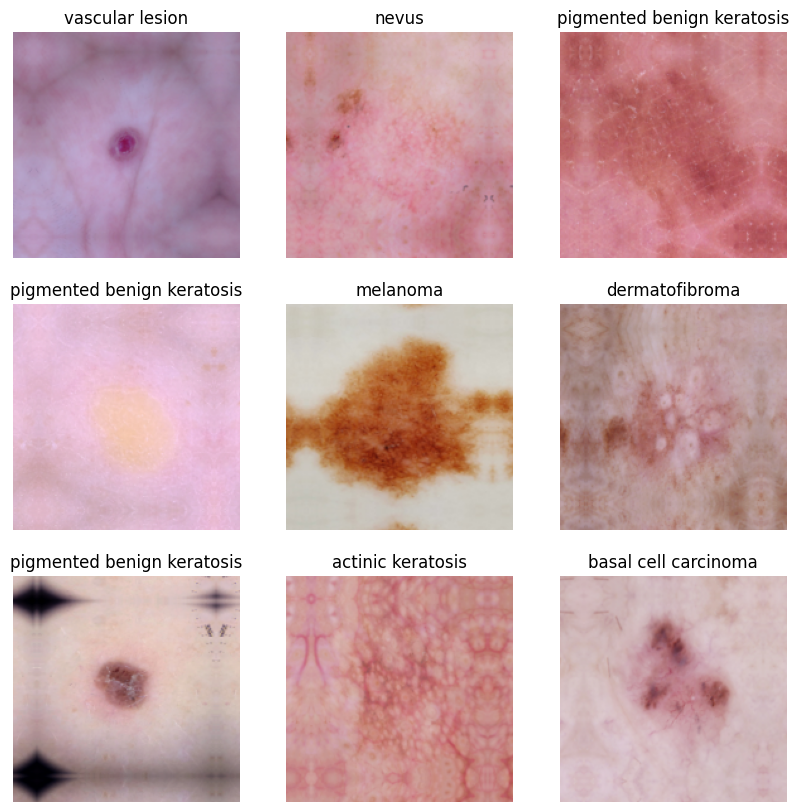

In [55]:
# Verifying how our data augmentation made changes to ourthe sample images
plt.figure(figsize=(10, 10))
for images, mapped_labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmentation_layer(images)[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(mapped_labels[i]).numpy()])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [56]:
# We are adding augmentation layer to our model
model = Sequential()
model.add(augmentation_layer)
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names), activation='softmax'))



### Compiling the model

In [57]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [58]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.1974 - loss: 2.3087 - val_accuracy: 0.3065 - val_loss: 1.8680
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.2773 - loss: 1.9754 - val_accuracy: 0.3602 - val_loss: 1.8418
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.3415 - loss: 1.8319 - val_accuracy: 0.4228 - val_loss: 1.6607
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4081 - loss: 1.6221 - val_accuracy: 0.4362 - val_loss: 1.6573
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4307 - loss: 1.6453 - val_accuracy: 0.4385 - val_loss: 1.5476
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4472 - loss: 1.5836 - val_accuracy: 0.4586 - val_loss: 1.5906
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4425 - loss: 1.5780 - val_accuracy: 0.4855 - val_loss: 1.4935
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4844 - loss: 1.4833 - val_accuracy: 0.4653 - v

### Visualizing the results

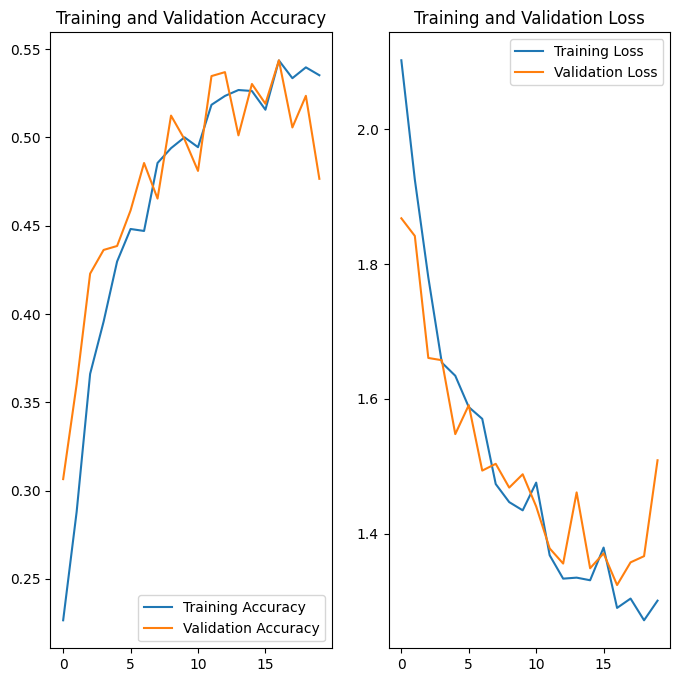

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Findings:
- After adding Image Augmentation layer, we can see that our training accuracy is aligned with our Validation Accuracy.
- Besides training loss and validation loss are in similar range(correlated).

    These Training and Validation Accuracies indicate that Our Overfit problem got solved. But there is a significant improvement required at Accuracy and loss of the model.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [60]:
## Your code goes here.
label_counts = {}

for images, labels in train_ds:
    for label in labels:
        class_index = tf.argmax(label).numpy()  
        class_name = class_names[class_index]
        if class_name not in label_counts:
            label_counts[class_name] = 1
        else:
            label_counts[class_name] += 1

<Axes: xlabel='label_name', ylabel='label_count'>

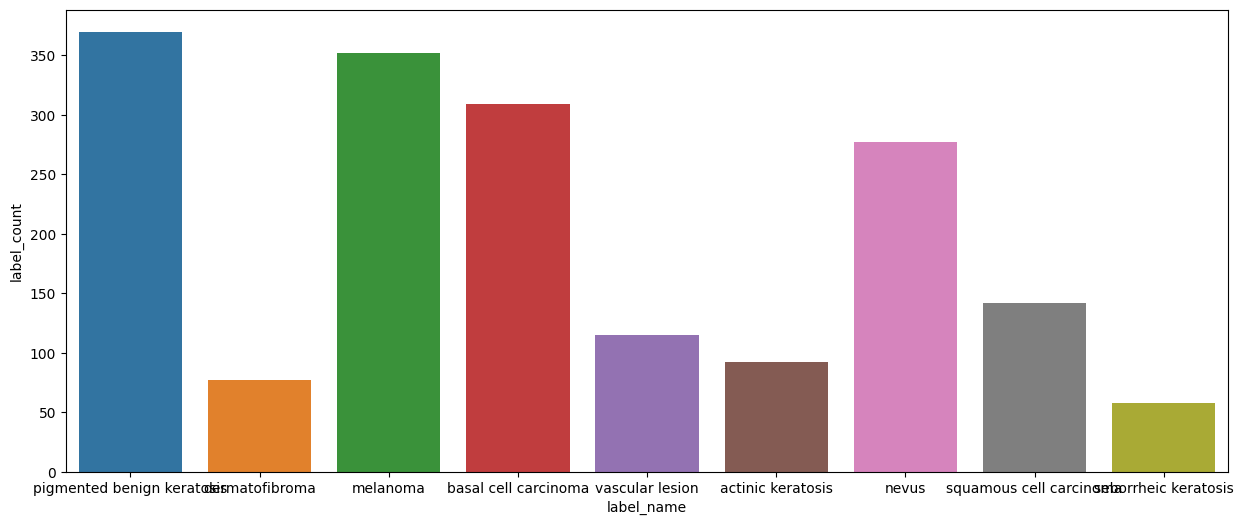

In [61]:
import seaborn as sns
label_count_df = pd.DataFrame({
    'label_name': label_counts.keys(),
    'label_count': label_counts.values()
})
plt.figure(figsize=(15, 6))
sns.barplot(data=label_count_df, x='label_name', y='label_count')

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
As per the above Graph, "seborrheic keratosis" has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
As per the above Graph, "pigmented benign keratosis", "melanoma" has the dominate the data in terms proportionate number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [62]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [63]:
path_to_training_dataset="/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D091973A7D0>: 100%|██████████| 500/500 [00:06<00:00, 80.89 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0919621DE0>: 100%|██████████| 500/500 [00:06<00:00, 80.12 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0940363070>: 100%|██████████| 500/500 [00:06<00:00, 73.10 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D0A69AAD450>: 100%|██████████| 500/500 [00:38<00:00, 13.00 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7D0A69EA9FC0>: 100%|██████████| 500/500 [00:31<00:00, 15.64 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0918BF6080>: 100%|██████████| 500/500 [00:06<00:00, 78.84 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D0A691E62C0>: 100%|██████████| 500/500 [00:15<00:00, 32.27 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0919763B50>: 100%|██████████| 500/500 [00:06<00:00, 73.67 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0A698506A0>: 100%|██████████| 500/500 [00:06<00:00, 80.78 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [76]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [68]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010537.jpg_2ed5ebc8-2175-48ed-a92f-7dc73993fd69.jpg',
 '/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010971.jpg_ab00d521-8d8a-4fe2-96b3-69ef9148d2fe.jpg',
 '/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010514.jpg_c576c5f1-4b05-4eef-8ab6-4177e8a8fdd3.jpg',
 '/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010164.jpg_163d0f85-1954-4fc6-8104-ec68e91dfe63.jpg',
 '/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000303.jpg_b0c92261-ba74-4bb7-a365-9e4aaf89ae98.jpg',
 '/kaggle/

In [70]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [90]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [91]:
path_list_old = [x for x in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])

In [98]:
new_df = pd.concat([original_df, df2], axis=0)

In [99]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [100]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [121]:
data_dir_train="/kaggle/working/melanomadetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    subset='training',
    label_mode='categorical',
    validation_split=0.2
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [102]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    subset='validation',
    label_mode='categorical',
    validation_split=0.2
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [122]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names), activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [123]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [124]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
  2/169 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.1953 - loss: 3.3778

W0000 00:00:1710893222.595621      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3739 - loss: 1.9479

W0000 00:00:1710893242.354119      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


169/169 ━━━━━━━━━━━━━━━━━━━━ 31s 135ms/step - accuracy: 0.3743 - loss: 1.9462 - val_accuracy: 0.1277 - val_loss: 2.7654
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.5655 - loss: 1.2252 - val_accuracy: 0.2146 - val_loss: 2.1603
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.6955 - loss: 0.8786 - val_accuracy: 0.4425 - val_loss: 1.5221
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.7794 - loss: 0.6266 - val_accuracy: 0.5316 - val_loss: 1.3618
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.8658 - loss: 0.3980 - val_accuracy: 0.6466 - val_loss: 0.9788
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.8997 - loss: 0.2858 - val_accuracy: 0.6526 - val_loss: 1.1839
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9206 - loss: 0.2287 - val_accuracy: 0.7713 - val_loss: 0.6762
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9282 - loss: 0.1978 - val_accura

#### **Todo:**  Visualize the model results

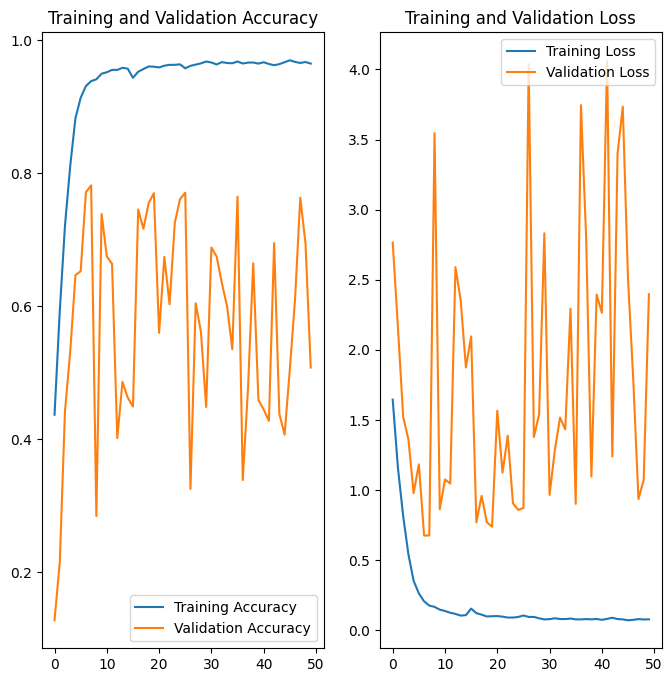

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Yes class rebalance helped in increasing Accuracy on Training Data.
- But Model is still overfit on training data which made low Accuracy on Validation data.
- We can eliminate the overfit by hyperparameter tuning further.